Exploratory Data Analysis and Feature Engineering on the Indian Diabetes Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sort
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier\n",
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,roc_curve,roc_auc_score

Data Reading

In [3]:
data = pd.read_csv('C:/Users/per35/Downloads/DS_Python_Practice/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lets begin with identifying the missing values in the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Lets see the heat map for the same for clear visibility of the data if we are missing any values through the seaborn

<AxesSubplot:>

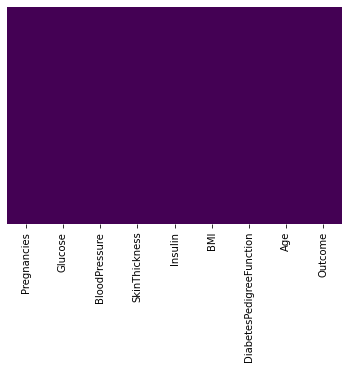

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Hence, we can conclude that there are no missing values in the data. We can move onto the EDA

<AxesSubplot:xlabel='Outcome', ylabel='count'>

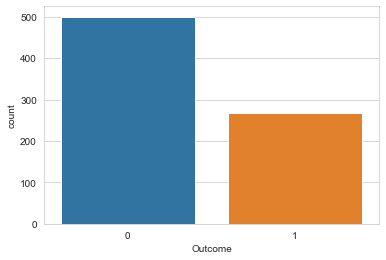

In [7]:
 sns.set_style('whitegrid')
sns.countplot(x = 'Outcome', data = data)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
print('The number of women in the sample with and without diabetes are \n', data['Outcome'].value_counts())

The number of women in the sample with and without diabetes are 
 0    500
1    268
Name: Outcome, dtype: int64


Therefore 34.9% of the women in the sample have diabetes

Lets see the distribution of the age they spreaded across

C:\Users\per35\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

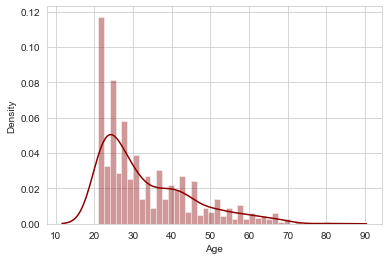

In [11]:
sns.distplot(data['Age'].dropna(), kde = True, color = 'darkred', bins = 40)

Lets try to see the distribution of each individual independent variable

C:\Users\per35\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\per35\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\per35\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

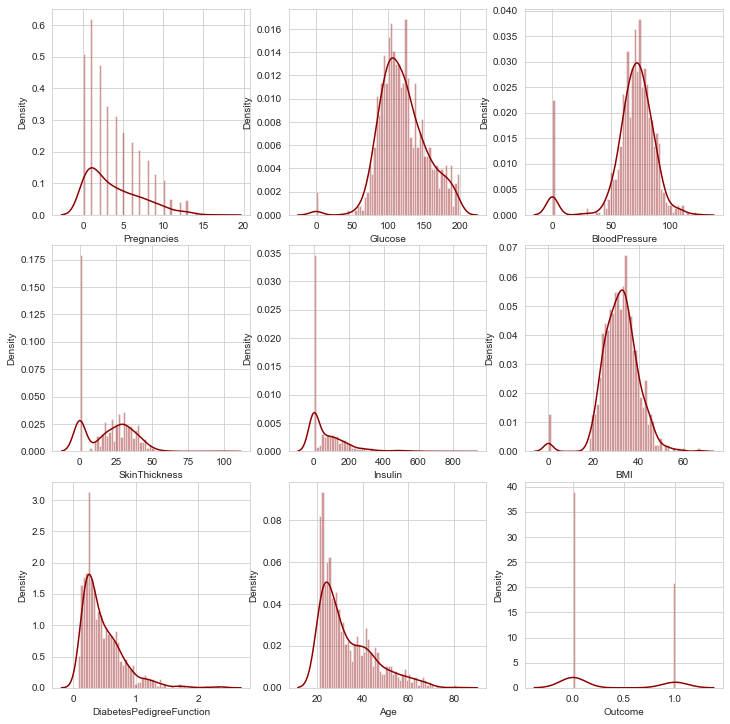

In [12]:
number_of_features = data.columns
nrows = 3
ncols = 3
plt.subplots(nrows, ncols, figsize = (10, 10))
plt.tight_layout()
counter = 1
for i in number_of_features:
    plt.subplot(nrows, ncols, counter)
    sns.distplot(data[i], kde = True, color = 'darkred', bins = 60)
    counter+=1

C:\Users\per35\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\per35\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\per35\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\per35\Anacond

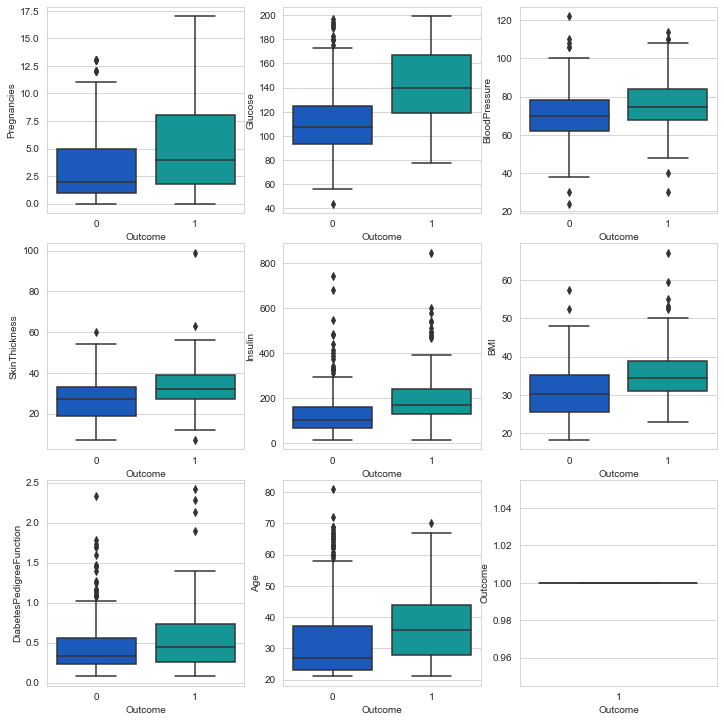

In [15]:
nrows = 3
ncols = 3
plt.subplots(nrows, ncols, figsize = (10, 10))
plt.tight_layout()
counter = 1
for i in number_of_features:
    
    if i in ['Pregnancies', 'Age', 'DiabetesPedigreeFunction']:
        plt.subplot(nrows, ncols, counter)
        sns.boxplot(x = 'Outcome',y = i ,data = data, palette = 'winter')
        counter+=1
    else:
        mini = data[data[i]!=0]
        plt.subplot(nrows, ncols, counter)
        sns.boxplot(mini['Outcome'], mini[i], palette = 'winter')
        counter+=1

Lets calculate the missing values proportion in the given data.

Observation: We can clearly see that 'Pregnancies', 'Age', 'DiabetesPedigreeFunction' has no missing values or  no value with '0' entry. 

In [18]:
for i in number_of_features:
    if i in ['Pregnancies', 'Age', 'DiabetesPedigreeFunction']:
        
        pass
    
    else:
        
        data[i] = data[i].map( lambda x : data[i].mean() if x == 0 else x)